In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import scipy.integrate as integrate

%matplotlib inline

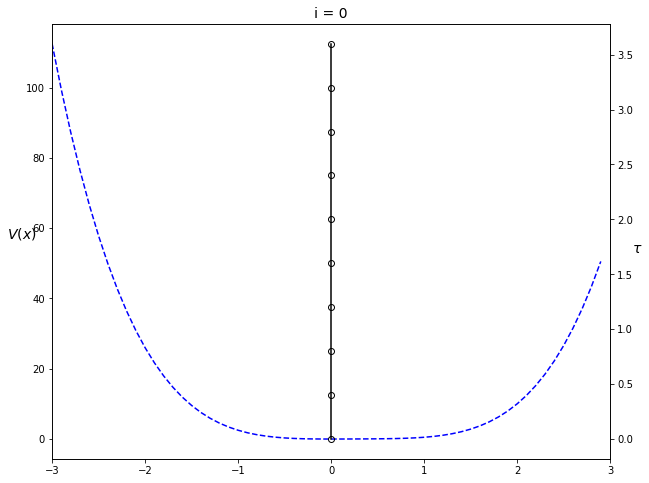

constep


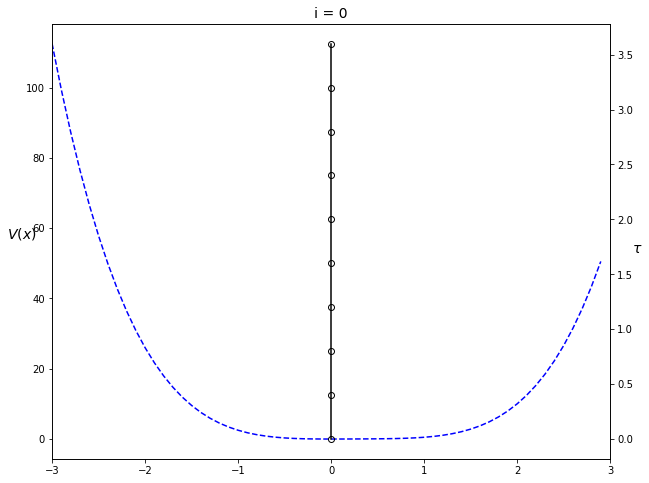

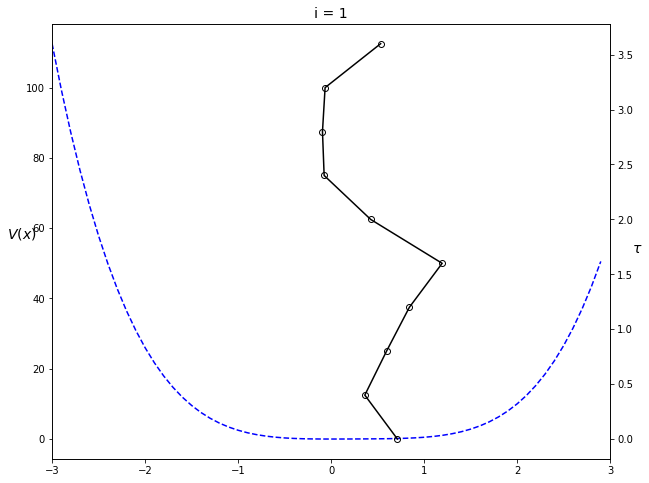

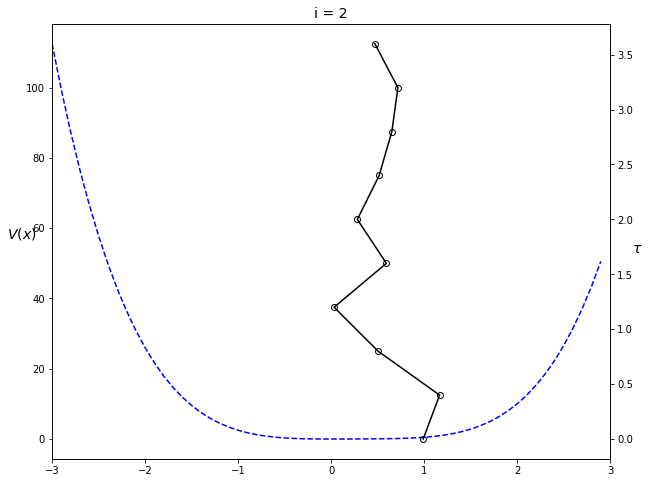

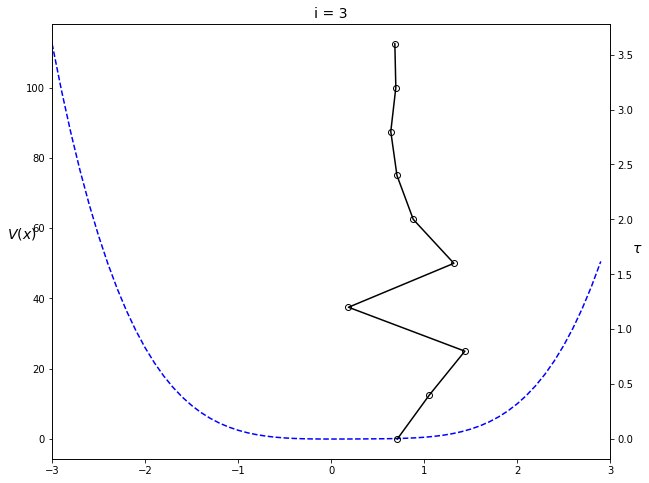

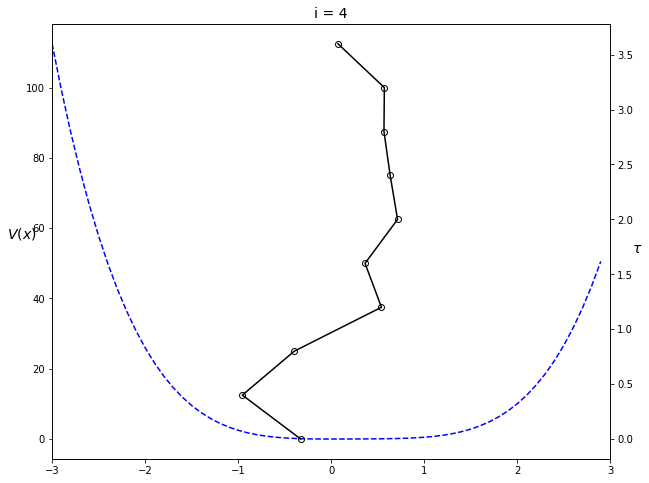

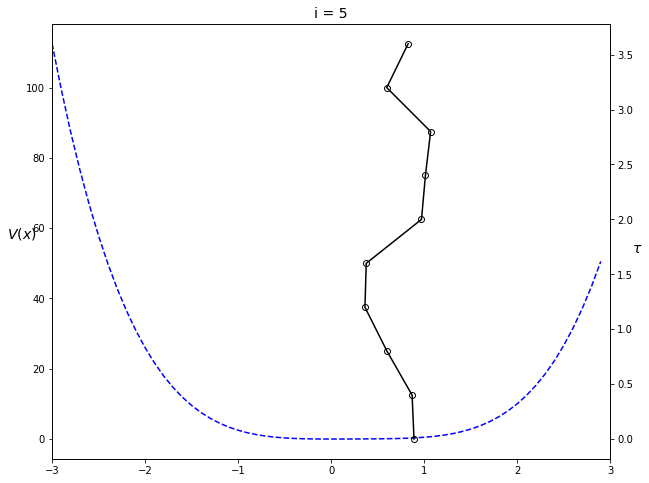

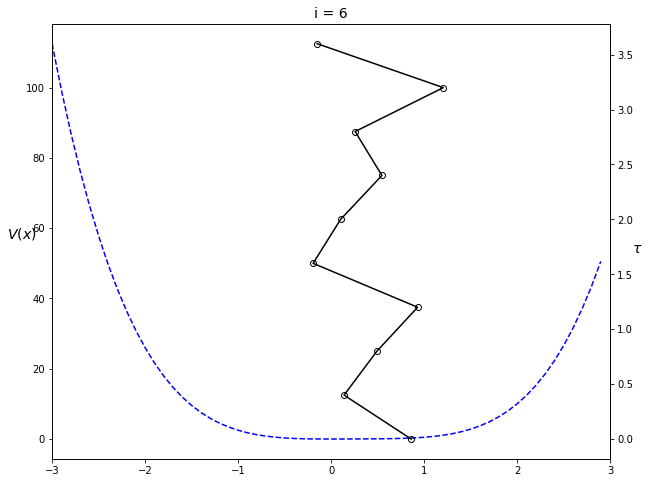

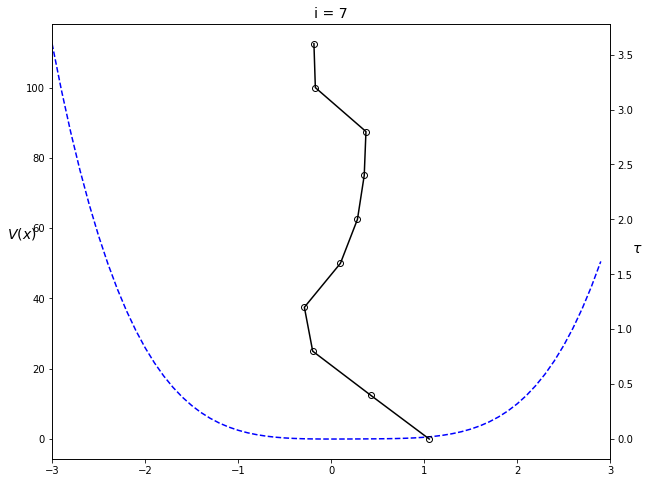

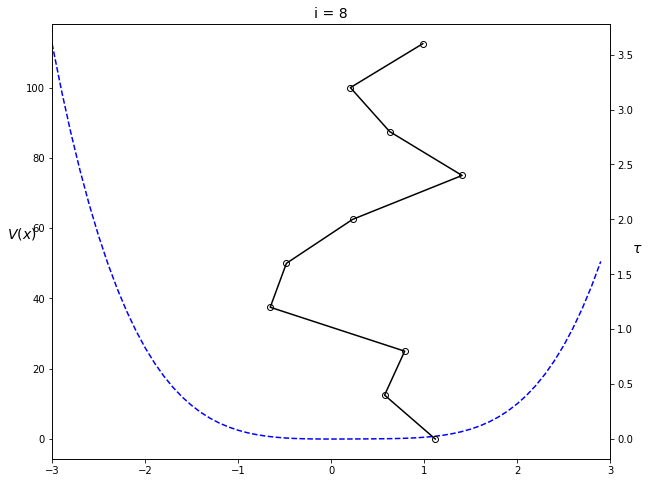

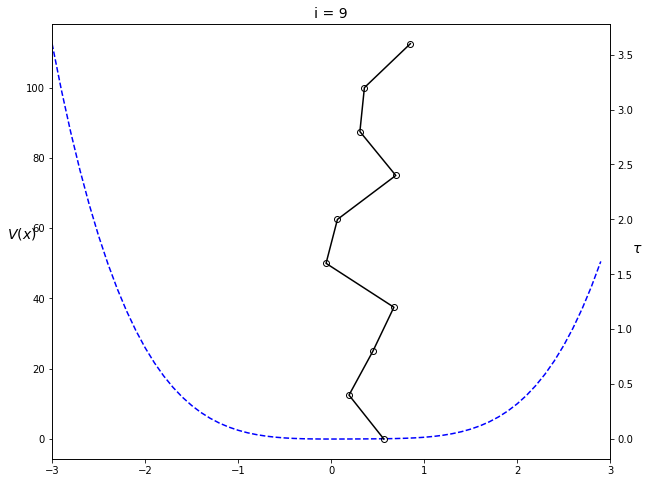

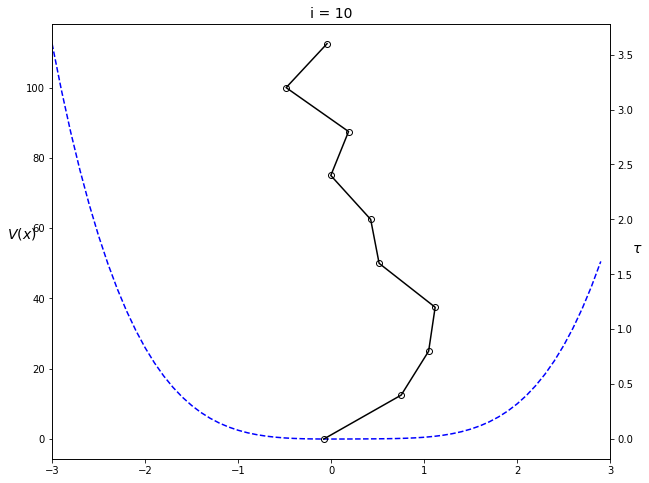

constep


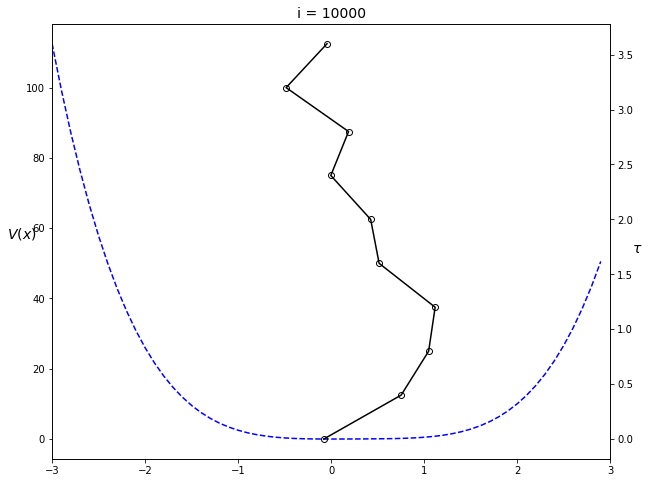

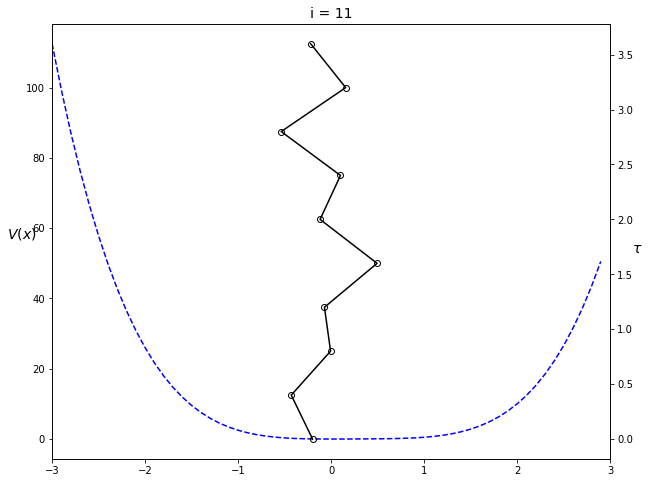

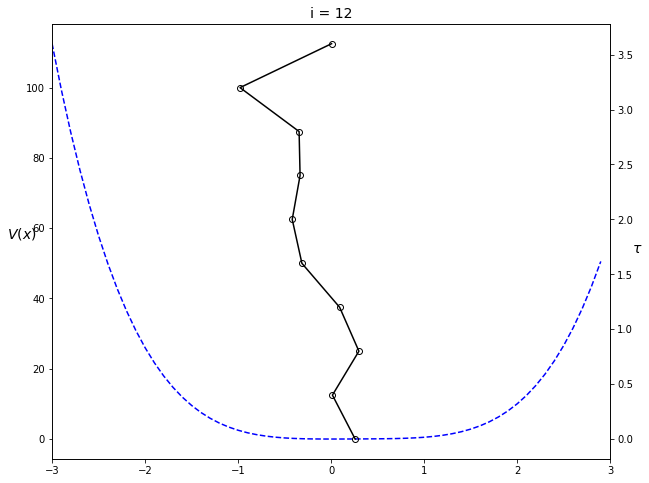

constep


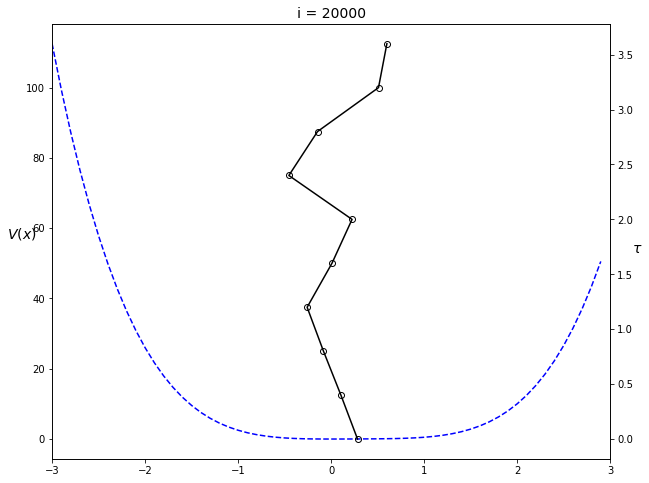

constep


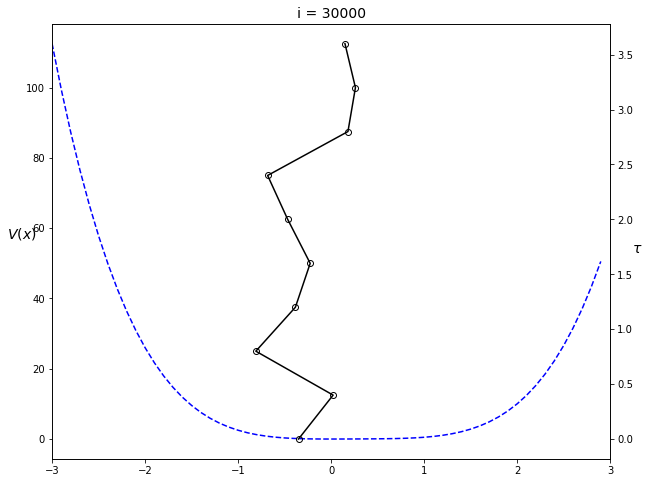

constep


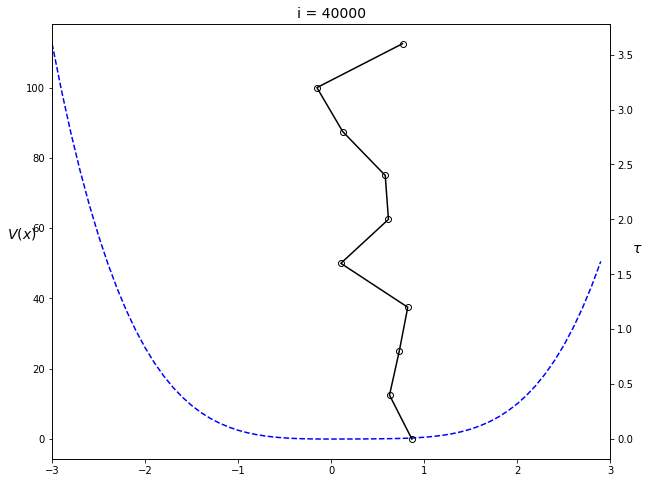

constep


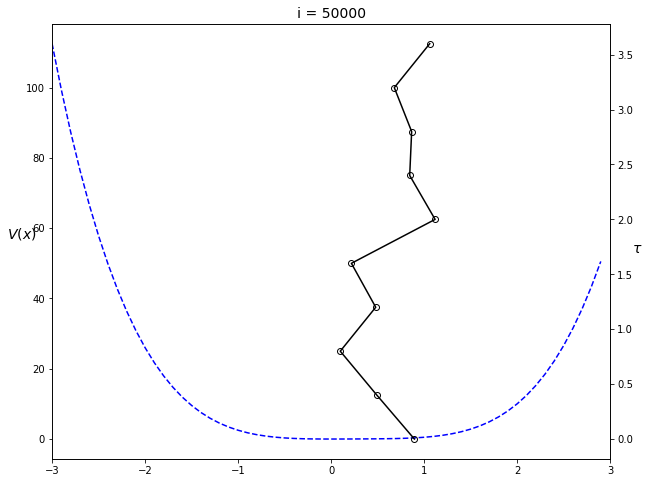

constep


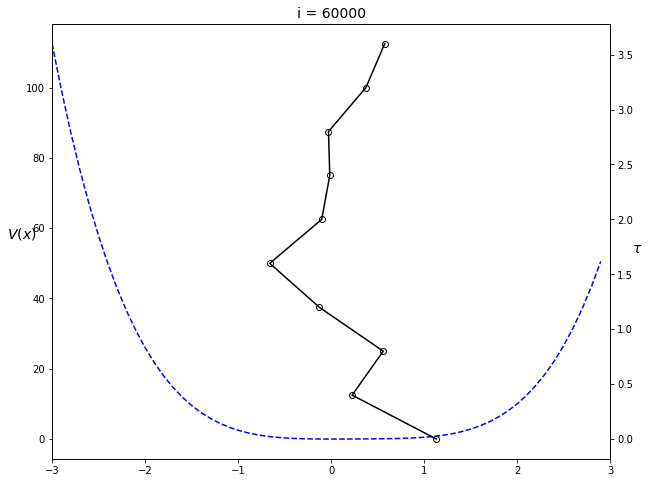

constep


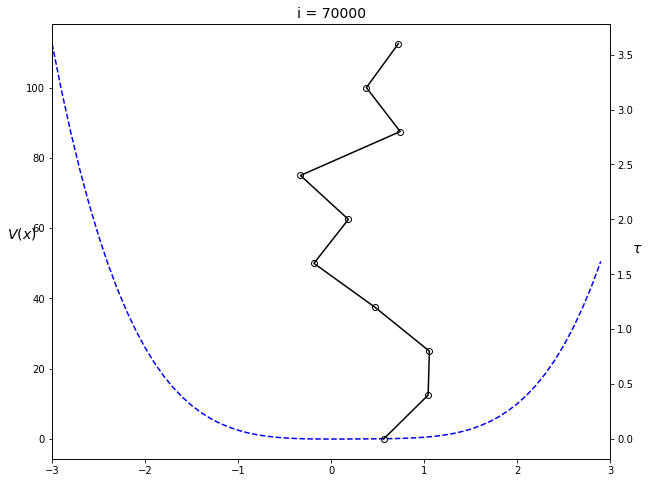

constep


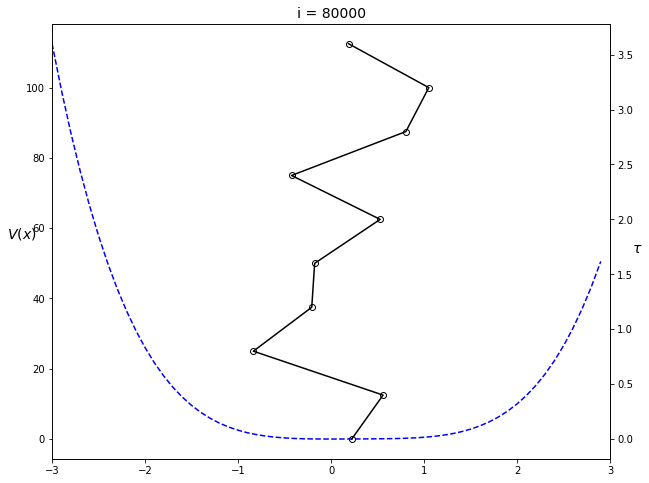

constep


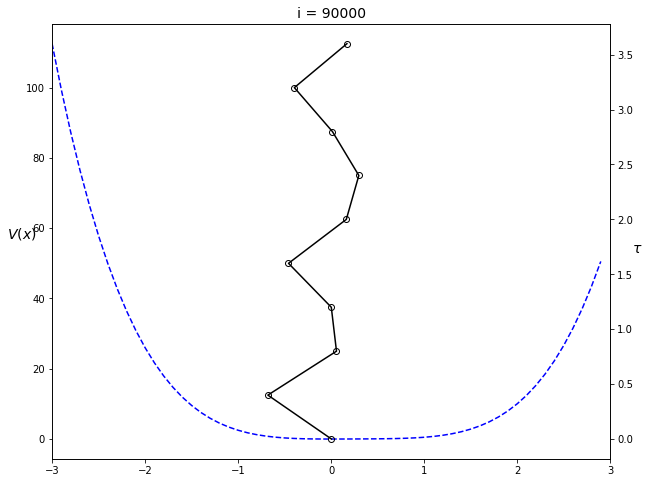

In [11]:
#Elementos no diagonales de la matriz densidad particula libre 

def rho_free(x,xp,beta):
    return (np.exp(-(x-xp)**2/(2.0*beta))/np.sqrt(2.0*np.pi*beta))


beta = 4.0
#número de nodos en el camino
N = 10  
#discretización del camino
dtau = beta/N    
#desplazamiento máximo de un nodo
delta = 1.0            
#pasos de monte carlo
n_steps = 100000         

#camino inicial
x=[0.0]*N                 
y=np.arange(0,beta,dtau)

#potencial teórico
xgrid = np.arange(-3,3,0.1)
potential = (0.5*(xgrid**2) -(xgrid**3) + (xgrid**4))

#guardar camino. XS[k][movidas en k]: secuencias de desplazamiento de cada nodo

XS = []

for j in range(N):
     XS.append([])

#secuencia de movimientos del nodo 0        
xpath0 = []

#
x_all = []
i = 0

#como son caminos cerrados 
#(estoy sumando n_steps posibles caminos para que la partícula oscile de una posición a otra) 
#al final sí estoy calculando la probabilidad de estar en una cierta posición. 

for step in range(n_steps):
    k = random.randint(0,N-1) 
    
    #nodo anterior y posterior  (es con modulo para que no se
    #salga del tamaño del arreglo x): si k = N-1 -> N%N = 0, 
    #luego volvemos al punto incial: camino cerrado
  
    knext, kprev = (k+1)%N, (k-1)%N             
    
    #nueva posición: desplazamiento del nodo k
    x_new = x[k] + random.uniform(-delta,delta) 
   
    #pi(a)
    old_weight = (rho_free(x[kprev], x[k], dtau)* 
              rho_free(x[k], x[knext], dtau)*
              np.exp(-dtau*((0.5*x[k]**2) - x[k]**3 + x[k]**4)))
    #pi(b)
    new_weight = (rho_free(x[kprev], x_new, dtau)*
              rho_free((x_new), x[knext], dtau)*
              np.exp(-dtau*((0.5*x_new**2) - x_new**3 + x_new**4)))
    
    if random.uniform(0.0,1.0) < new_weight/old_weight:
        
        #cada vez que se acepta que un nodo se mueva, se está creando un nuevo camino
        x[k] = x_new
    
        #individales
        XS[k].append(x[k])
        
        #camino general
        x_all.append(x[k])
        
    if step%1000==0:
        xpath0.append(x[0])
        
    #graficar solo algunas iteraciones
    #hay un Camino de Feynman siempre que se mueva o no un nodo
        if i <13:
            plt.figure(figsize=(10,8))
            #plot potencial teórico: x^2/2
            plt.plot(xgrid, potential, "b--")
            plt.ylabel(r"$V(x)$",rotation=0, fontsize = 14, color = 'k')
            plt.twinx()
            #grafica que camino en ésta iteración
            plt.plot(x, y, color="k", ls="-", marker='o', fillstyle='none')
            plt.ylabel(r"$\tau$",rotation=0, fontsize = 14, color = 'k')
            plt.xlabel(r"Posiciones", fontsize = 14)
            plt.xlim(-3,3)
            plt.title("i = %i" %i,fontsize = 14)
            plt.savefig("images/caminos13iter/anPath_%i.png" %i)
            plt.show()
            i = i+1
    
    if step%10000==0:
        print("constep")
        plt.figure(figsize=(10,8))
        #plot potencial teórico: x^2/2
        plt.plot(xgrid, potential, "b--")
        plt.ylabel(r"$V(x)$",rotation=0, fontsize = 14, color = 'k')
        plt.twinx()
        #grafica que camino en ésta iteración
        plt.plot(x, y, color="k", ls="-", marker='o', fillstyle='none')
        plt.ylabel(r"$\tau$",rotation=0, fontsize = 14, color = 'k')
        plt.xlabel(r"Posiciones", fontsize = 14)
        plt.xlim(-3,3)
        plt.title("i = %i" %step,fontsize = 14)
        plt.savefig("images/caminos/anPath_%i.png" %step)
        plt.show()
        






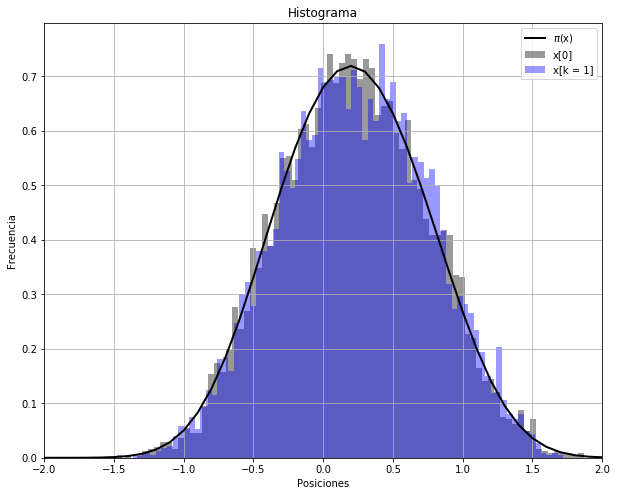

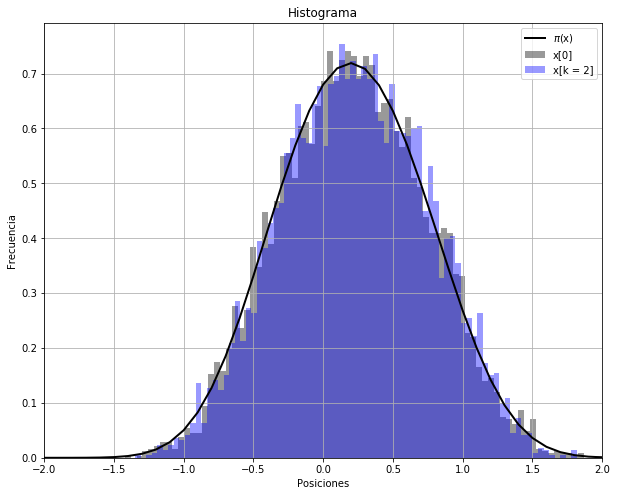

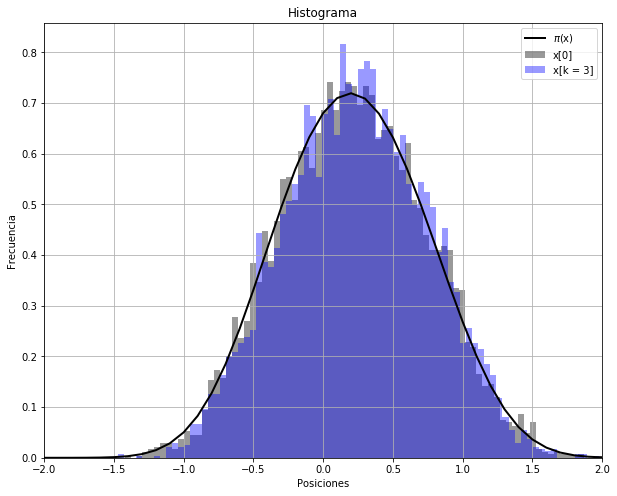

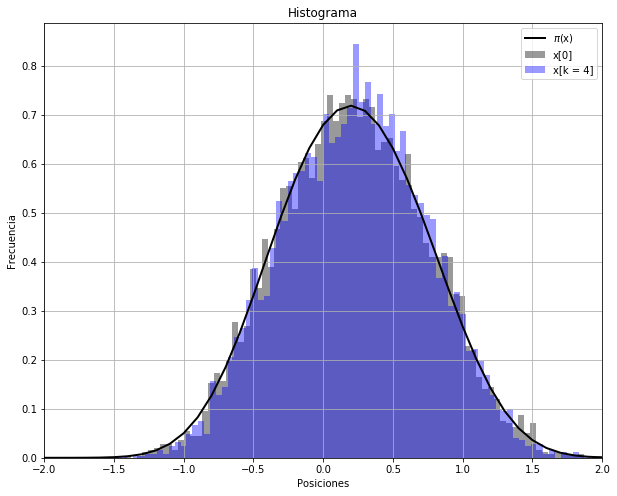

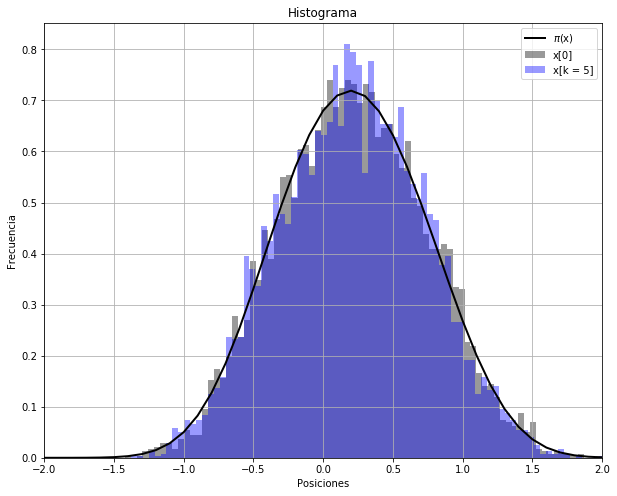

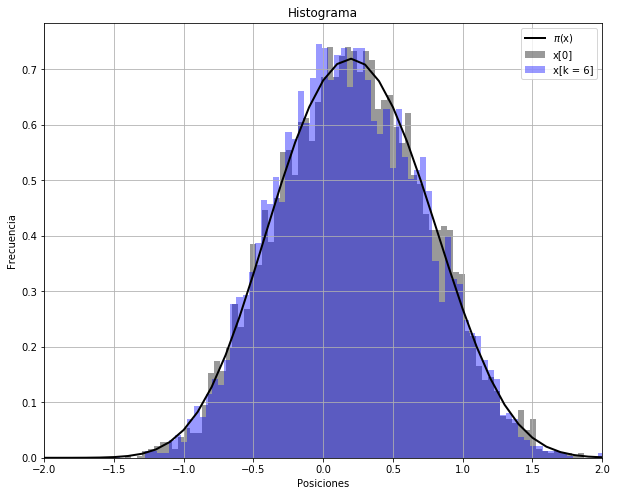

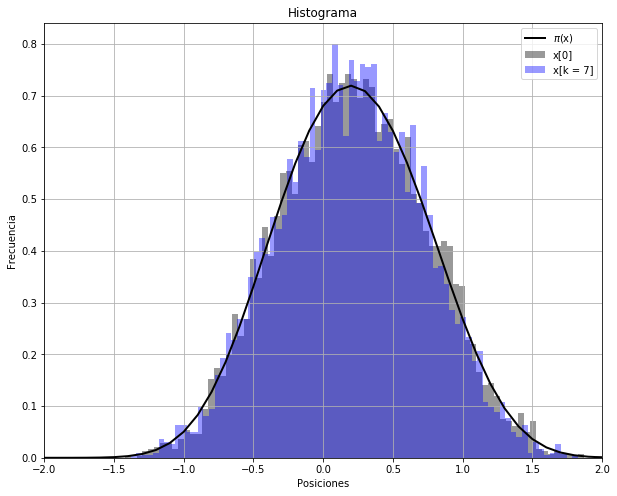

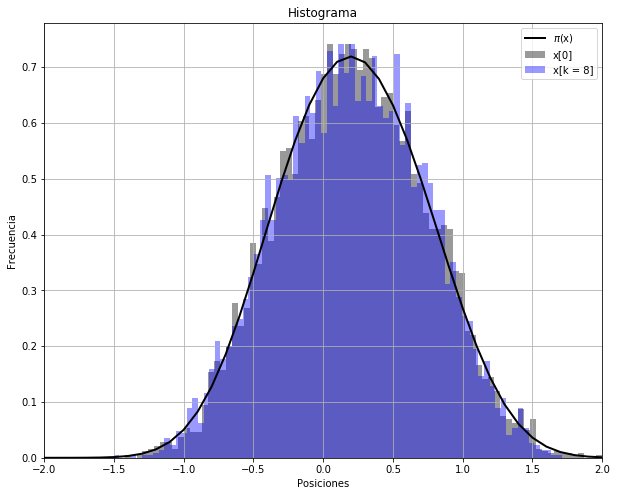

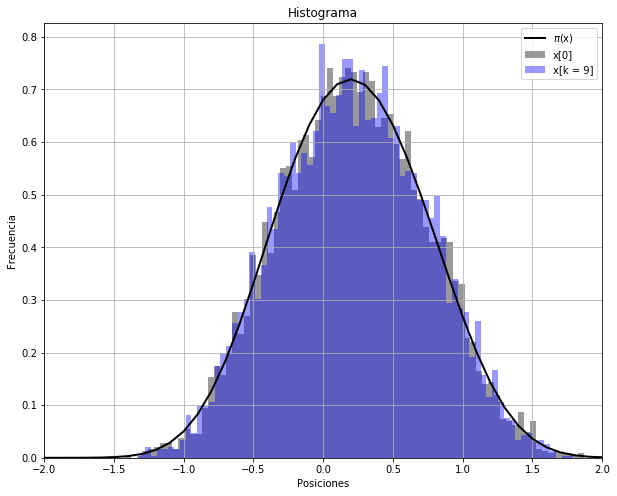

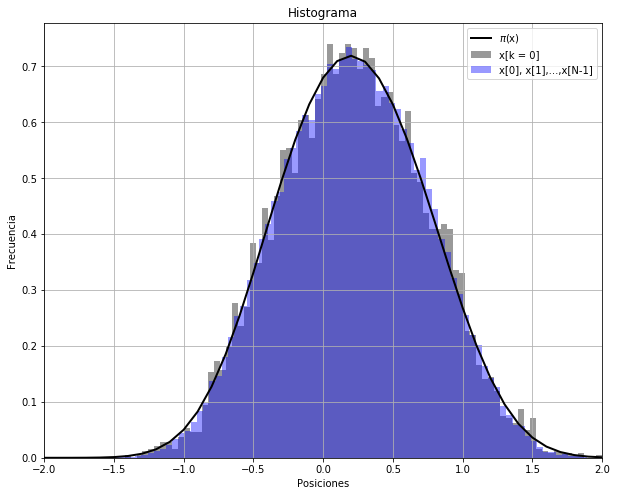

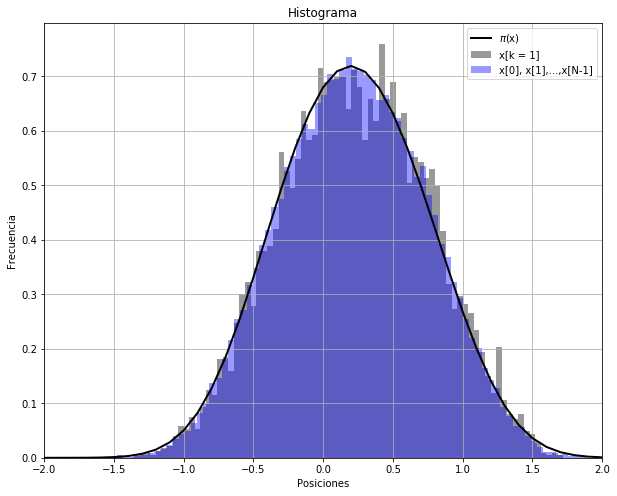

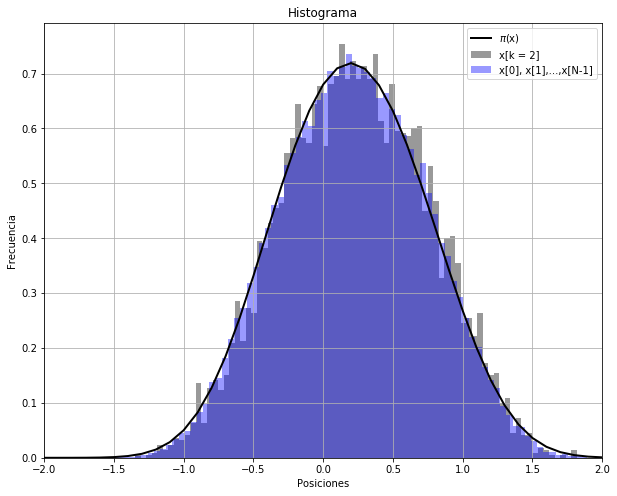

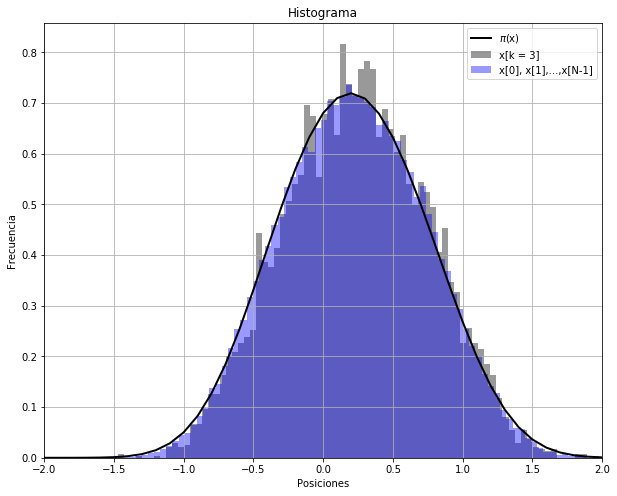

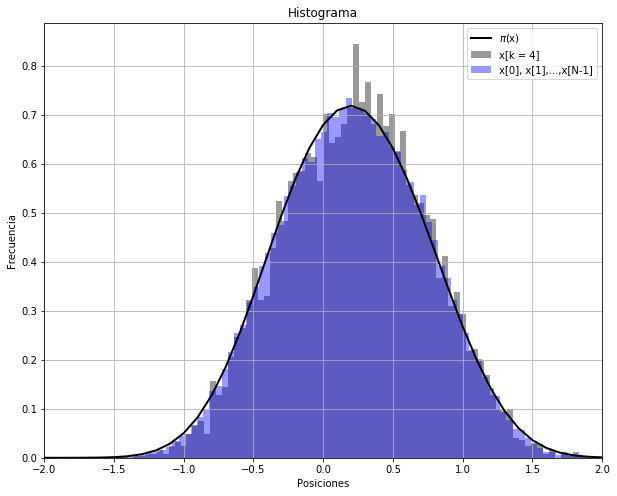

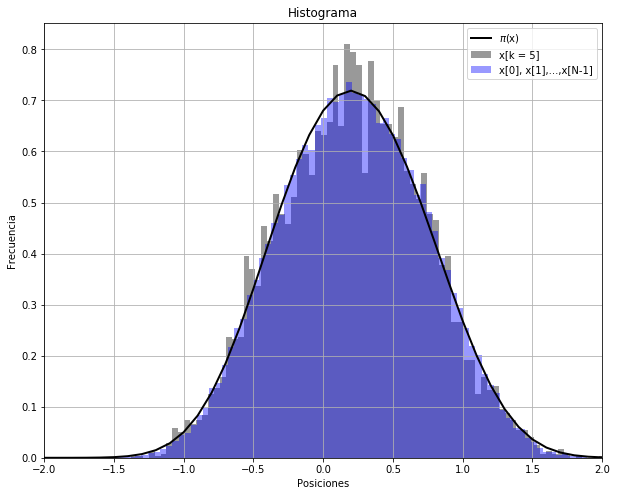

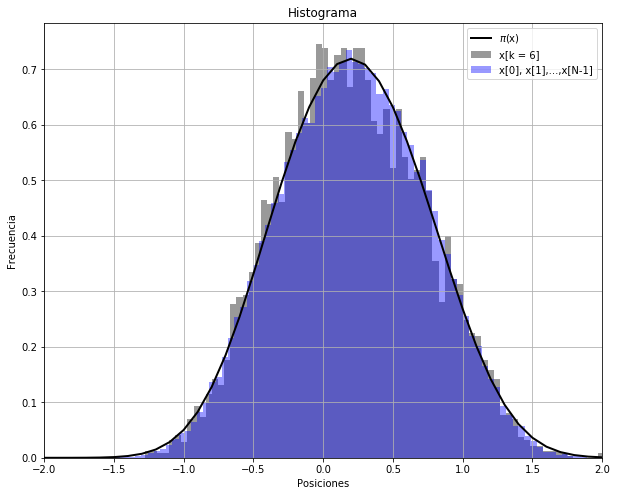

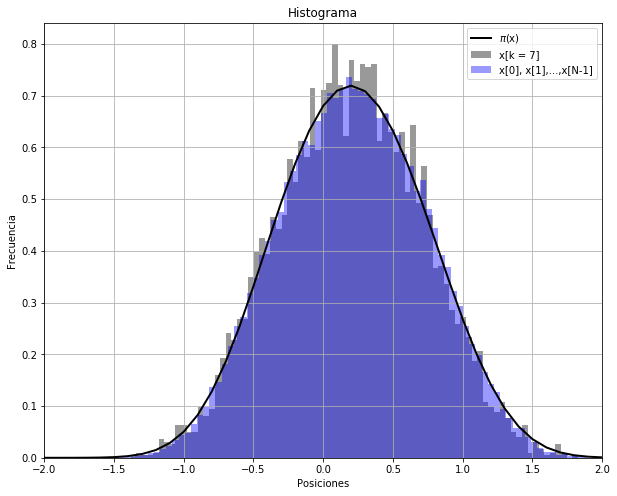

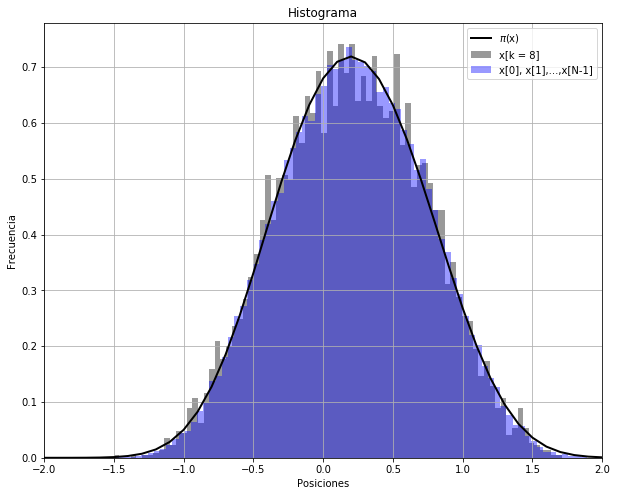

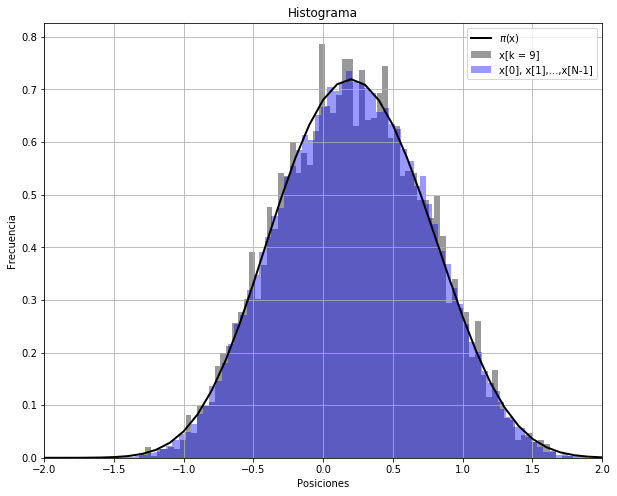

In [12]:
#graficas histograma x[0] vs x[k]

data = np.genfromtxt("anharmonic_matrixsquaring_beta4.0_dx0.100.dat")

X = data[:,0]
PIX = data[:,1]

n_bins = 80

for k in range(1,N):
    
    plt.figure(figsize=(10,8))
    
    #curva de pi(x) usando matrix-squaring
    plt.plot(X, PIX, color = "k", lw = 2, label = r"$\pi$(x)")
    
    #histograma x[k=0]
    plt.hist(XS[0], bins=n_bins,normed=True, histtype='bar', color="k", alpha=0.4, \
             lw=1.8, label="x[0]")
   
    #histograma x[k]
    plt.hist(XS[k], bins=n_bins, normed=True, histtype='bar', color ="b", alpha=0.4, lw = 1.8, \
             label =r"x[k = %r]" %k)
    
    plt.xlim(-2.0,2.0)
    plt.xlabel(r"Posiciones")
    plt.ylabel(r"Frecuencia")
    plt.title(r"Histograma")
    plt.legend()
    plt.grid()
    plt.savefig("images/histogramas/anhistogramak0k_%i.png" % k)
    plt.show()
    
#histogramas camino completo

for k in range(0,N):
    
    plt.figure(figsize=(10,8))
    
    #curva de pi(x) usando matrix-squaring
    plt.plot(X, PIX, color = "k", lw = 2, label = r"$\pi$(x)")
   
    #histograma x[k]
    plt.hist(XS[k], bins=n_bins, normed=True, histtype='bar', color ="k", alpha=0.4, lw = 1.8, \
             label =r"x[k = %r]" %k)
    
    
    #histograma x_all : camino completo
    plt.hist(x_all, bins=n_bins, normed=True, histtype='bar', color ="b", alpha=0.4, lw = 1.8, \
             label =r"x[0], x[1],...,x[N-1]")
    
    plt.xlim(-2.0,2.0)
    plt.xlabel(r"Posiciones")
    plt.ylabel(r"Frecuencia")
    plt.title(r"Histograma")
    plt.legend()
    plt.grid()
    plt.savefig("images/histogramas/anhistograma_completok_%i.png" % k)
    plt.show()
    
    
    
    
    
    
    
    
    
    
    
    

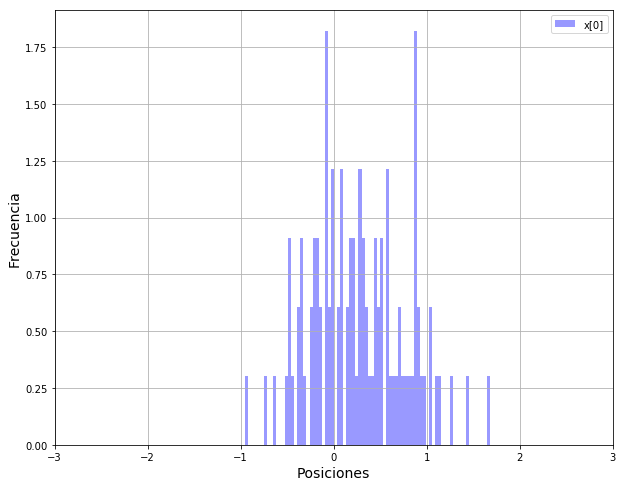

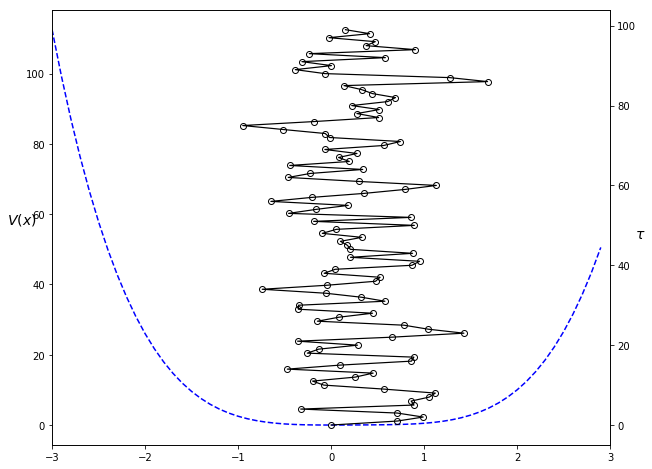

In [13]:
#histograma normalizado para x[0] de a 10 iteraciones
plt.figure(figsize=(10,8))
plt.hist(xpath0, bins=n_bins, normed=True, histtype='bar', color ="b", alpha=0.4, lw = 1.8, \
         label =r"x[0]")
plt.xlabel(r"Posiciones", fontsize = 14)
plt.ylabel(r"Frecuencia", fontsize = 14)
plt.legend()
plt.grid()
plt.xlim(-3,3)
plt.savefig("images/histogramax0/anhist_100iter.png")        
plt.show()

#camino de feynman para x[0] solo guardando de 10 iteraciones
y0 = np.arange(0,100)
plt.figure(figsize=(10,8))
#plot potencial teórico: x^2/2
plt.plot(xgrid, potential, "b--")
plt.ylabel(r"$V(x)$",rotation=0, fontsize = 14, color = 'k')
plt.twinx()
#grafica que camino en ésta iteración
plt.plot(xpath0, y0, color="k", ls="-", lw = 1.2, marker='o', fillstyle='none')  
plt.ylabel(r"$\tau$",rotation=0, fontsize = 14, color = 'k')
plt.xlabel(r"Posiciones", fontsize = 14)
plt.xlim(-3,3)
plt.savefig("images/histogramax0/anPathx0_100iter.png")        
plt.show()